In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

SIMULATION_FOLDER = "C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\code\\multivariate_hawkes\\data\\simulations\\multivariate_hawkes\\BTC_USD"

In [13]:
path = Path(SIMULATION_FOLDER)
method_simulation_subdirs = [
    d
    for d in path.rglob("")
    if d.is_dir()
    and not any(child.is_dir() for child in d.iterdir())
    and "900" in d.parts[-2]
]
method_simulation_subdirs

[WindowsPath('C:/Users/Admin/OneDrive - Politecnico di Milano/phd/code/multivariate_hawkes/data/simulations/multivariate_hawkes/BTC_USD/lshade_logged_training_time_900/simulation_seconds_120'),
 WindowsPath('C:/Users/Admin/OneDrive - Politecnico di Milano/phd/code/multivariate_hawkes/data/simulations/multivariate_hawkes/BTC_USD/training_time_900/simulation_seconds_120')]

In [17]:
path = Path(SIMULATION_FOLDER)
method_simulation_subdirs = [
    d
    for d in path.rglob("")
    if d.is_dir()
    and not any(child.is_dir() for child in d.iterdir())
    and "900" in d.parts[-2]
]

dfs_list = []
for method_simulation_subdir in method_simulation_subdirs:
    params = method_simulation_subdir.parts[-4:-1]

    dfs = []
    for file in list(method_simulation_subdir.glob("orderbook_changes_*.tsv")):
        df = pd.read_csv(file, sep="\t")
        dfs.append(df)

    df = pd.concat(dfs)
    df["error"] = (df["real"] - df["predicted"]).abs()
    df["method"] = "lshade" if "lshade" in str(method_simulation_subdir) else "greedy"
    df["pair"] = params[1]
    df["param"] = params[2][-3:]

    dfs_list.append(df)

df = pd.concat(dfs_list)
df["method_param"] = df["method"] + "_" + df["param"]
df = df.reset_index(drop=True)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9988\3528316406.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs)


,real,predicted,error,method,pair,param,method_param
0,0.029,6.790468,6.761468,lshade,BTC_USD,900,lshade_900
1,0.242,9.279054,9.037054,lshade,BTC_USD,900,lshade_900
2,0.461,0.631230,0.170230,lshade,BTC_USD,900,lshade_900
3,0.677,0.778668,0.101668,lshade,BTC_USD,900,lshade_900
4,0.894,0.953389,0.059389,lshade,BTC_USD,900,lshade_900


<Axes: xlabel='param', ylabel='error'>

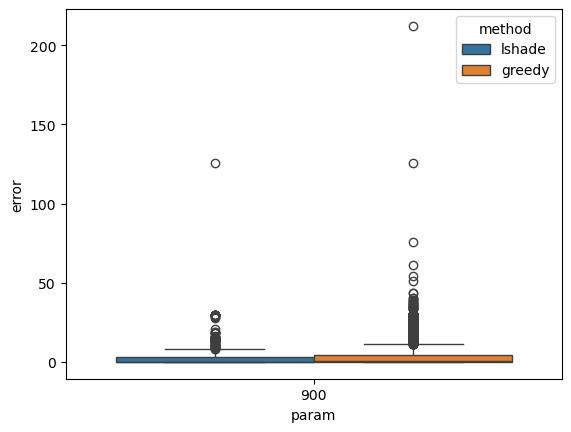

In [18]:
sns.boxplot(x="param", y="error", data=df, hue="method")

<Axes: xlabel='param', ylabel='error'>

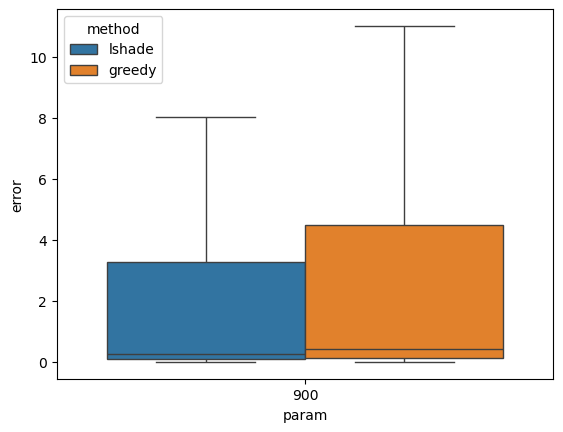

In [19]:
sns.boxplot(x="param", y="error", data=df, hue="method", showfliers=False)